<a href="https://colab.research.google.com/github/febse/ts2025/blob/main/01-Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction {#introduction}


In [97]:
# Install packages missing on Google Colab

%pip install statsforecast

Note: you may need to restart the kernel to use updated packages.


In [98]:
# Import required Python packages for time series work
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: prettier plots
plt.style.use("seaborn-v0_8")

# If a package is missing, install it in your environment, e.g.:


## Time Series Definition

A *time series* is a sequence of values ordered by time. This course will focus on series that take values in $\mathbb{R}$. Let
$x_1, x_2, \ldots, x_T$ be a sequence of values ordered by a time index
$t = 1,\ldots,T$. As a starting example we will use a bank account.


:::{.callout-note}
## Regular and Irregular Time Series

In this course we will deal with observations
recorded at fixed time intervals (e.g. hourly, daily, weekly, monthly, annually, etc.).
For example, _every day_ you measure your morning travel duration from home to the university.

Consider your daily step count. Let's say you copy
the number of steps at the end of the day from your
health app into a spreadsheet. Sometimes do it on Monday
evening, sometime on a Wednesday, sometimes you might miss a
couple of weeks and record it again. This would be
an example of an _irregular_ time series (of your daily step counts).

:::




## A Deterministic Time Series


Imagine that you deposit 10 USD in an account that pays 2 percent _monthly_
interest. If you don't deposit or withdraw anything during the life
of the deposit, it will grow according according to the compound interest rule.

For convenience we will introduce a mathematical notation to describe the amount
in your bank account. Lets introduce an index $t$ that runs from $t = 0$ 
to $t = T = 60$ (let's say your deposit agreement expires after 60 months (5 years)).

In the first month you have 

$$
x_0 = 10 \quad \text{USD}
$$

in your account. In the second month:

$$
\begin{align}
x_1 & = x_0 + 0.02 x_0  \\ 
    & = (1 + 0.02) x_0 \quad \text{USD}
\end{align}
$$

In the third month the value of your deposit grows to:

$$
x_2 = (1 + 0.02) x_1
$$

and in any month you can write the formula for the amount in the account as:

$$
\underbrace{x_t}_{\text{Current amount}} = (1 + 0.02) \underbrace{x_{t - 1}}_{\text{Amount previous month}}
$$

Next we want to calculate the amount in the bank account for each month and this will be much easier
if we had a formula expressing the amount directly in terms of $t$. It is very easy to obtain this,
the only thing you need to do is to substitute $x_{t - 1}$ in the expression for $x_t$.



$$
\begin{align}
x_{t} & = (1 + 0.02) x_{t - 1} \\
      & = (1 + 0.02) \left((1 + 0.02) x_{t - 2} \right) \\
      & = (1 + 0.02)^2 x_{t - 2} \\
      & = (1 + 0.02)^2 \left((1 + 0.02) x_{t - 3} \right) \\
      & = (1 + 0.02)^3 x_{t - 3} \\
      & \vdots \\
      & = (1 + 0.02)^t x_{0}
\end{align}
$$


In [99]:
# A variable holding the initial amount
x_0 = 10

# A sequence 0, 1, 2, ... 61 (60 months)
t = np.arange(0, 61)

# The amount in each month, calculated according to the formula.
# The ** means exponentiation

x_t = x_0 * (1 + 0.02) ** t

# Put into a DataFrame for convenience
account = pd.DataFrame({"t": t, "amount": x_t})

# Display the first few values
account.head()

,t,amount
0,0,10.000000
1,1,10.200000
2,2,10.404000
3,3,10.612080
4,4,10.824322


Text(0, 0.5, 'Amount (USD) in t')

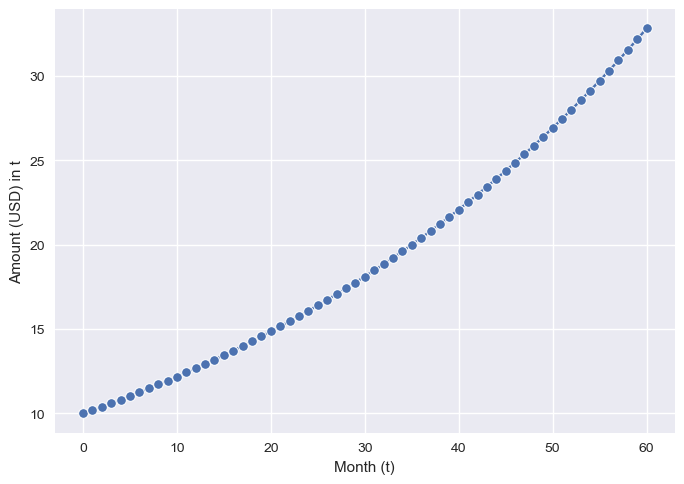

In [100]:
# Plot the geometric series

sns.lineplot(data=account, x="t", y="amount", marker="o")
plt.xlabel("Month (t)")
plt.ylabel(r"Amount (USD) in t")

## Date and Time objects in Pandas

As our observations will be ordered by time it is convenient to use tools that support
handling. In this course we will mostly use `pandas` for both date/time and data handling.

First, let's see how we can create date objects in `pandas`.

In [101]:
# Working with date objects in Python
import pandas as pd

origin = pd.to_datetime("1970-01-01")
jan02_1970 = pd.to_datetime("1970-01-02")

Time is stored as the number of seconds (and fractions of a second)
since the origin: 1970-01-01 00:00:00
[UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time). POSIX
stands for [Portable Operating System
Interface](https://en.wikipedia.org/wiki/POSIX).

The package `lubridate` provides utility functions for working with date
and time objects. You can look at this online guide
[here](https://lubridate.tidyverse.org/).

In [102]:
# Parsing non-ISO date strings with an explicit format
origin1 = pd.to_datetime("01-01-1970", format="%d-%m-%Y")
origin1.value

0

In [103]:
# Working with pandas datetime-like accessors
import pandas as pd

today = pd.Timestamp.today()

print("Today's date is:", today)

# Normalize sets the time to midnight (00:00:00)
today = today.normalize()

print("Today's date is (with time set to midnight):", today)

print("The year is:", today.year)

print("The month (number) is:", today.month)

print("The day of the month is:", today.day)

# Note that dayofweek is an integer, where Monday=0, Sunday=6
# also note that in other programming languages this may be locale dependent (e.g. Sunday=0)

print("The day of the week (number, Monday=0) is:", today.dayofweek)

print("The day of the week (name) is:", today.day_name())

print("The day of the year is:", today.dayofyear)

print("The week of the year is (ISO week):", today.isocalendar().week)

print("The quarter (number) is:", today.quarter)

Today's date is: 2025-09-29 15:30:43.154563
Today's date is (with time set to midnight): 2025-09-29 00:00:00
The year is: 2025
The month (number) is: 9
The day of the month is: 29
The day of the week (number, Monday=0) is: 0
The day of the week (name) is: Monday
The day of the year is: 272
The week of the year is (ISO week): 40
The quarter (number) is: 3


In [104]:
# Exercise: Pandas Timestamps
# 1. What day of the week was the 10-th of June 2019?
# 2. Create a sequence of 34 consecutive dates starting on the 2-nd of January 2017. What was the year quarter of the last date of this sequence?


In [105]:
# Exercise solution space
# Type your code here



## Pandas' DateTimeIndex

Pandas data frames support indexing by a dates which is very useful in time series analysis. Let's create
a sequence of values 

In [106]:
start_month = pd.Timestamp.today().normalize().replace(day=1)
start_month

Timestamp('2025-09-01 00:00:00')

In [107]:
# Create a date range with monthly frequency 'MS' starting from start_month
# with the same length
idx_monthly = pd.date_range(start=start_month, periods=len(account), freq="MS")
idx_monthly

DatetimeIndex(['2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01',
               '2026-01-01', '2026-02-01', '2026-03-01', '2026-04-01',
               '2026-05-01', '2026-06-01', '2026-07-01', '2026-08-01',
               '2026-09-01', '2026-10-01', '2026-11-01', '2026-12-01',
               '2027-01-01', '2027-02-01', '2027-03-01', '2027-04-01',
               '2027-05-01', '2027-06-01', '2027-07-01', '2027-08-01',
               '2027-09-01', '2027-10-01', '2027-11-01', '2027-12-01',
               '2028-01-01', '2028-02-01', '2028-03-01', '2028-04-01',
               '2028-05-01', '2028-06-01', '2028-07-01', '2028-08-01',
               '2028-09-01', '2028-10-01', '2028-11-01', '2028-12-01',
               '2029-01-01', '2029-02-01', '2029-03-01', '2029-04-01',
               '2029-05-01', '2029-06-01', '2029-07-01', '2029-08-01',
               '2029-09-01', '2029-10-01', '2029-11-01', '2029-12-01',
               '2030-01-01', '2030-02-01', '2030-03-01', '2030-04-01',
      

In [108]:
account = account.set_index(idx_monthly)
account.index.name = "date"

## DateTimeIndex Operations

Now that we have indexed our data frame by dates, we can use it to perform various operations, for example:

- Subsetting by date ranges
- Resampling to different frequencies
- Rolling window calculations


In [109]:
# Extract the values after the start of 2029
account.loc["2029":]

,t,amount
date,,
2029-01-01,40,22.080397
2029-02-01,41,22.522005
2029-03-01,42,22.972445
2029-04-01,43,23.431894
2029-05-01,44,23.900531
2029-06-01,45,24.378542
2029-07-01,46,24.866113
2029-08-01,47,25.363435
2029-09-01,48,25.870704


In [110]:
# Extract the values before (and including) 2027-09

account.loc[:"2027-09"]

,t,amount
date,,
2025-09-01,0,10.000000
2025-10-01,1,10.200000
2025-11-01,2,10.404000
2025-12-01,3,10.612080
2026-01-01,4,10.824322
2026-02-01,5,11.040808
2026-03-01,6,11.261624
2026-04-01,7,11.486857
2026-05-01,8,11.716594


In [111]:
# Extract the values between for 2026 and 2027

account.loc["2026":"2027"]

,t,amount
date,,
2026-01-01,4,10.824322
2026-02-01,5,11.040808
2026-03-01,6,11.261624
2026-04-01,7,11.486857
2026-05-01,8,11.716594
2026-06-01,9,11.950926
2026-07-01,10,12.189944
2026-08-01,11,12.433743
2026-09-01,12,12.682418


In [112]:
# Quarterly average (resample to quarter and compute the average)
account["amount"].resample("QE").mean()

date
2025-09-30    10.000000
2025-12-31    10.405360
2026-03-31    11.042251
2026-06-30    11.718125
2026-09-30    12.435368
2026-12-31    13.196512
2027-03-31    14.004245
2027-06-30    14.861416
2027-09-30    15.771054
2027-12-31    16.736369
2028-03-31    17.760768
2028-06-30    18.847869
2028-09-30    20.001510
2028-12-31    21.225762
2029-03-31    22.524949
2029-06-30    23.903656
2029-09-30    25.366751
2029-12-31    26.919399
2030-03-31    28.567081
2030-06-30    30.315615
2030-09-30    32.171173
Freq: QE-DEC, Name: amount, dtype: float64

In [113]:
# Rolling average over a 12-month window, aligned to the right
account["amount"].rolling(window=12, min_periods=12).mean()

date
2025-09-01          NaN
2025-10-01          NaN
2025-11-01          NaN
2025-12-01          NaN
2026-01-01          NaN
                ...    
2030-05-01    27.247266
2030-06-01    27.792211
2030-07-01    28.348056
2030-08-01    28.915017
2030-09-01    29.493317
Freq: MS, Name: amount, Length: 61, dtype: float64

## Rate of Change

A central theme in this course will be the study of _change_ in time series. We will work with mainly three measures of change:

1. The absolute change $x_t - x_{t-1}$ (if we think about $x_t$ as the value today, then $x_{t-1}$ is the value yesterday (or the previous month in this particular case)).
   because we will refer often to this measure, we will use a special shorthand notation for it:

    $$
    \Delta x_t = x_t - x_{t-1}
    $$

    and we will call it the *first difference* of the series $x_t$.

2. The relative change
    $$
    r_t = \frac{x_t - x_{t-1}}{x_{t-1}}
    $$
    
    which is the absolute change relative to the previous value. This measure is often expressed in percentage points (i.e. multiplied by 100).
    This measure is often called the *rate of change* or the *growth rate* of the series $x_t$.
    In financial applications this measure is often called the return of the series $x_t$.

3. The logarithmic difference
    $$
    \log(x_t) - \log(x_{t-1}) \approx r_t
    $$
    
    which is the difference of the logarithms of the two values. This measure is often called the *log return* or the *continuously compounded return* of an asset if $x_t$ is the asset's value. Note that
    this generally makes sense only for positive values of $x_t$ as the logarithm is not defined for non-positive values (including zero).


In [114]:
# Calculate returns and log-returns
account["lag_1"] = account["amount"].shift(1)

account["diff"] = account["amount"].diff()

account["return"] = account["amount"].pct_change().round(5)  # (x_t - x_{t-1})/x_{t-1}

account["log_return"] = np.log(account["amount"]).diff().round(5)

account.head()

,t,amount,lag_1,diff,return,log_return
date,,,,,,
2025-09-01,0,10.000000,NaN,NaN,NaN,NaN
2025-10-01,1,10.200000,10.00000,0.200000,0.02,0.0198
2025-11-01,2,10.404000,10.20000,0.204000,0.02,0.0198
2025-12-01,3,10.612080,10.40400,0.208080,0.02,0.0198
2026-01-01,4,10.824322,10.61208,0.212242,0.02,0.0198


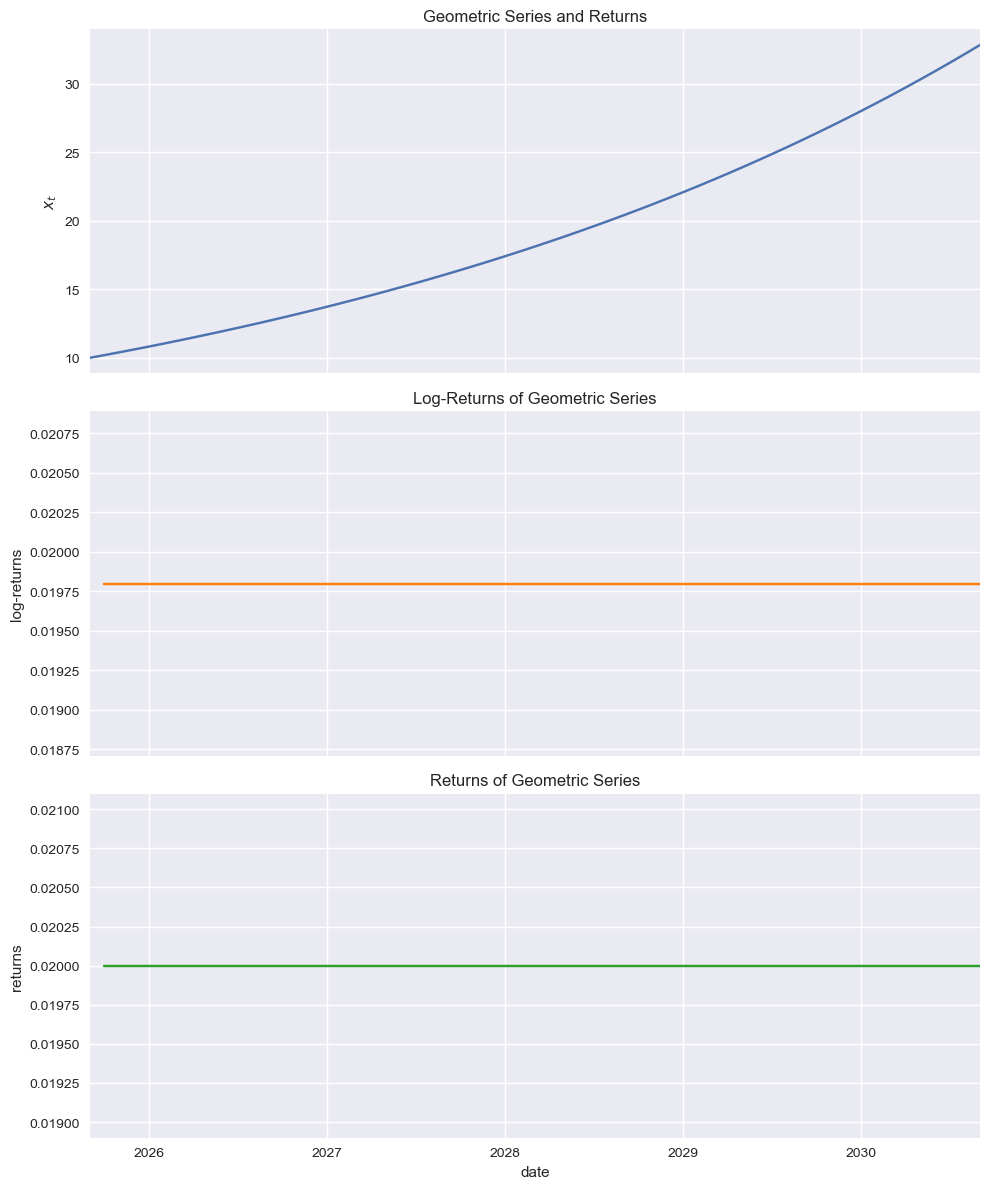

In [115]:
# Plot level, log-returns, and returns

fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

account["amount"].plot(ax=axes[0], title="Geometric Series and Returns")
axes[0].set_ylabel(r"$x_t$")

account["log_return"].plot(ax=axes[1], color="tab:orange", title="Log-Returns of Geometric Series")
axes[1].set_ylabel("log-returns")

account["return"].plot(ax=axes[2], color="tab:green", title="Returns of Geometric Series")
axes[2].set_ylabel("returns")

plt.tight_layout()

## Noisy Time Series

Let's assume that you deposit (or withdraw) a random amount of money every month, for example between -5 and +5 USD, reflecting your monthly expenses and income.
On average, you expect to deposit 0 USD per month.
Let's assume that every amount is equally likely (uniform distribution) and that the distribution of deposits/withdrawals does not change over time.
In other words we assume that the deposits/withdrawals are i.i.d. (independent and identically distributed) random variables.

The independent assumption means that the distribution of the deposit/withdrawal at time $t$ does not depend on the deposits/withdrawals at previous times.
For example, if you withdrew a large amount of money in some month (to buy a car for example) and then you
decide that you need to save more in the months after to
compensate for the withdrawal, then the deposits/withdrawals would not be independent.

The model for your bank account balance is now:

$$
\begin{align}
x_t & = (1 + 0.02)x_{t - 1} + \epsilon_t,\quad x_0 = 10 \\
\epsilon_t & \sim \text{i.i.d. } U(-5, 5)
\end{align}
$$

where $\epsilon_t$ is a random variable representing the random deposit (positive values) or withdrawal (negative values) in month $t$.

For simplicity, we assume that your bank account balance can go negative (i.e. you can have an overdraft) and that the
interest is paid on the negative balance as well (i.e. you pay the bank for the credit).

In [116]:
np.random.seed(41232)

account["noise"] = np.random.uniform(-5, 5, size = len(account))
account["amount_noisy"] = account["amount"] + account["noise"]

account.head()

,t,amount,lag_1,diff,return,log_return,noise,amount_noisy
date,,,,,,,,
2025-09-01,0,10.000000,NaN,NaN,NaN,NaN,3.632542,13.632542
2025-10-01,1,10.200000,10.00000,0.200000,0.02,0.0198,-1.557040,8.642960
2025-11-01,2,10.404000,10.20000,0.204000,0.02,0.0198,3.006988,13.410988
2025-12-01,3,10.612080,10.40400,0.208080,0.02,0.0198,-2.067997,8.544083
2026-01-01,4,10.824322,10.61208,0.212242,0.02,0.0198,1.731834,12.556155


<Axes: xlabel='date'>

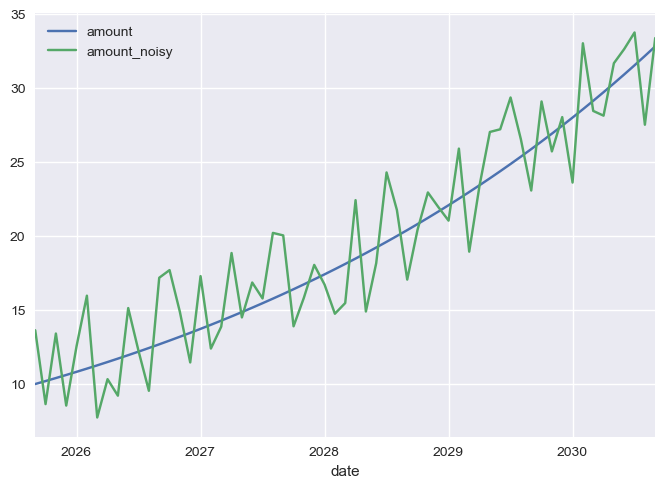

In [117]:
account[["amount", "amount_noisy"]].plot()

## Forecasting

A main goal of this course is to learn how to forecast future values of a time series based on its past values. This is especially
important in all areas of business and economics. For example, a company might want to forecast future sales to plan its production and inventory
or a central bank needs to forecast inflation to set its monetary policy.

In the case of the deterministic series we could simply use the formula in equation {eq-geom-series} to compute the future values of the series.
And we will be able to forecast the future values of the series without error. With the noisy series, however, every forecast will be subject to some error.

## The Naive Forecast

The simplest forecast is the so-called *naive forecast*. You just take the last observed value of the series and this is your forecast for all future values.


In [118]:
# Assume observations end on 2028-12 and we want the value in 2028-12
account.loc["2028-12"]["amount_noisy"]

date
2028-12-01    21.966342
Freq: MS, Name: amount_noisy, dtype: float64

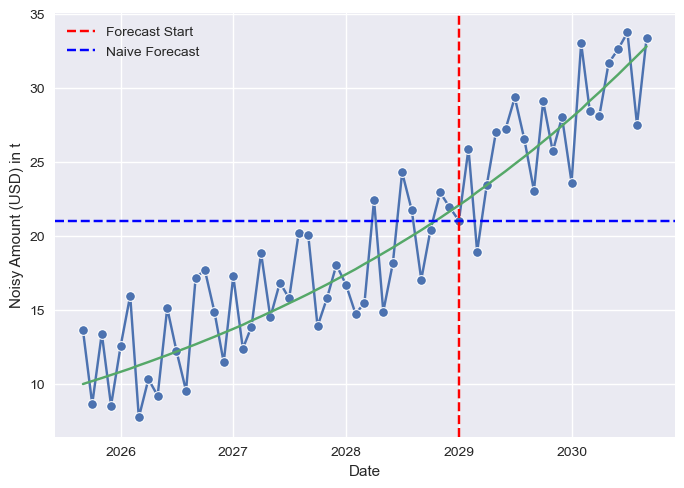

In [119]:
# Plot the noisy series and the naive forecast after 2028-12
sns.lineplot(data=account, x="date", y="amount_noisy", marker="o")

# Add the noiseless amount
plt.plot(account.index, account["amount"], marker="")

plt.axvline(pd.to_datetime("2029-01-01"), color="red", linestyle="--", label="Forecast Start")
plt.axhline(y=account.loc["2029-01-01"]["amount_noisy"], color="blue", linestyle="--", label="Naive Forecast")

plt.xlabel("Date")
plt.ylabel(r"Noisy Amount (USD) in t")

plt.legend()

Although the naive forecast is very simple, it is an extremely useful benchmark. 
Any forecast model that you develop should be at least as good as the naive forecast, 
otherwise it is very likely not worth using.

It is also a nice place to introduce specialized libraries that can handle both naive and more advanced forecasting methods.

A recent addition to the Python ecosystem is the `statsforecast` library which provides a unified interface to several forecasting methods
and provides convenient functionality for evaluating forecast accuracy.

In order to use it, we need to restructure our data a bit. The library expects a `pandas` DataFrame in long format
with three columns:

1. An identifier column called `unique_id` (for multiple time series)
2. A date column called `ds` 
3. A value column called `y`.

In our case we have only one time series (the `amount_noisy` column) but we still need to move the date index to a column and add an identifier column.

In [120]:
account_ds = account.reset_index()[["date", "amount_noisy"]].rename(columns={"date": "ds", "amount_noisy": "y"})
account_ds["unique_id"] = "amount_noisy"

account_ds.head()

,ds,y,unique_id
0,2025-09-01,13.632542,amount_noisy
1,2025-10-01,8.642960,amount_noisy
2,2025-11-01,13.410988,amount_noisy
3,2025-12-01,8.544083,amount_noisy
4,2026-01-01,12.556155,amount_noisy


In [121]:
from statsforecast import StatsForecast
from statsforecast.models import Naive

# Train/test split
train_end = pd.Timestamp("2028-12-01")
train_df = account_ds[account_ds["ds"] <= train_end]
test_df = account_ds[account_ds["ds"] > train_end]

h = len(test_df)
print(f"Train rows: {len(train_df)}, Test rows: {len(test_df)} (h={h})")

# Fit Naive and forecast h steps ahead
sf = StatsForecast(
    models=[Naive()], 
    freq="MS"
)

sf = sf.fit(train_df)

predicted_df = sf.predict(h=h, level=[90])
predicted_df.tail()

Train rows: 40, Test rows: 21 (h=21)


c:\Users\Boyko Amarov\.conda\envs\ts2025\Lib\site-packages\statsforecast\core.py:492: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,Naive,Naive-lo-90,Naive-hi-90
unique_id,,,,
amount_noisy,2030-05-01,21.966343,-6.490766,50.423450
amount_noisy,2030-06-01,21.966343,-7.315780,51.248466
amount_noisy,2030-07-01,21.966343,-8.118178,52.050865
amount_noisy,2030-08-01,21.966343,-8.899725,52.832413
amount_noisy,2030-09-01,21.966343,-9.661965,53.594650


c:\Users\Boyko Amarov\.conda\envs\ts2025\Lib\site-packages\statsforecast\core.py:1447: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


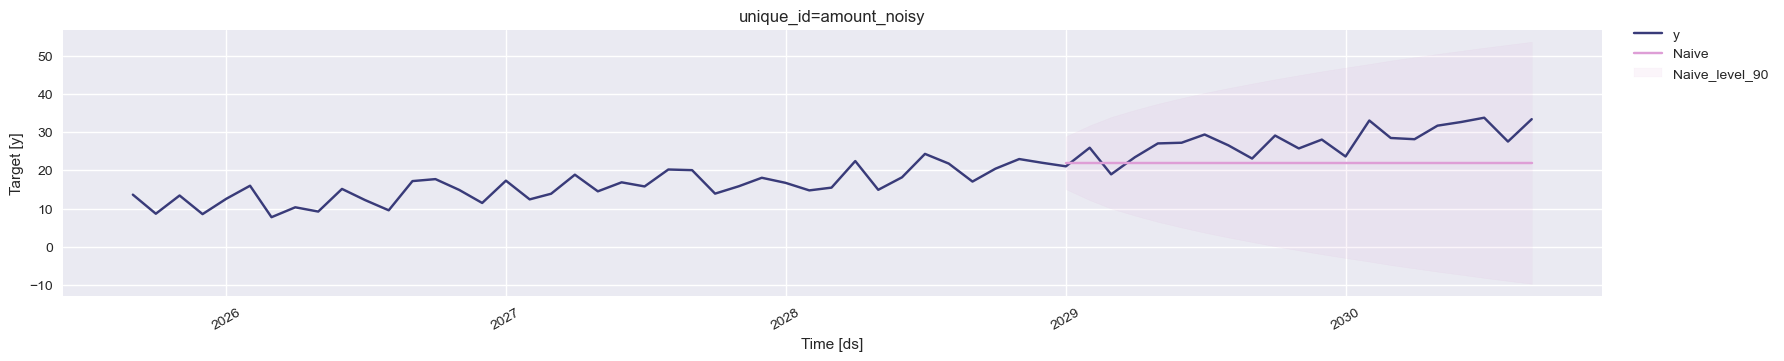

In [122]:
sf.plot(account_ds, predicted_df, level=[90])

## Forecasting Error

There are several measures of forecasting error that we will encounter in this course. One of the most important
if the Sum of Squared Errors (SSE) which is defined as:

$$
\text{SSE} = \sum_{t = 1}^{T} (x_{t} - \hat{x}_{t})^2
$$

where $x_t$ is the actual value of the series at time $t$ and $\hat{x}_t$ is the forecasted value of the series at time $t$.

:::{.callout-note }
## Hats

As we did in our econometrics course, we will use hats to denote forecasts or estimates of parameters.
As is customary in the time-series literature we will use the same notation for the _value_ of the forecast
and the _function_ that produces the forecast. The two are _not_ the same!
The forecast function takes as input the past values of the series and produces as output the forecasted value.

In the naive forecast $\hat{x}_t = x_{t-1}$, the forecast function simply returns
the last observed value of the series.

:::

The squared error gives you an idea about how different your forecasts are from the actual values of the series.
For a perfect forecast the squared error is 0.  It has two drawbacks, however:

1. It grows with $T$, the number of values for which we compute the error. This makes it hard to compare the forecasting error when considering different forecast horizons.
2. It has an unintuitive measurement unit. If the series $x_t$ is measured in USD, then the squared error is measured in $\text{USD}^2$.

We can cure the first issue by dividing the squared error by the number of forecasted values $h$. This gives us the Mean Squared Error (MSE):

$$
\text{MSE} = \frac{1}{T} \sum_{t = 1}^{T} (x_{t} - \hat{x}_{t})^2
$$

We can address the second issue by taking the square root of the MSE. This gives us the Root Mean Squared Error (RMSE):

$$
\text{RMSE} = \sqrt{\frac{1}{T} \sum_{t = 1}^{T} (x_{t} - \hat{x}_{t})^2}
$$

Now we have an error measure on the same scale as the original series and that does not depend on the number of forecasted values.

It is still hard to compare the RMSE of two different series, however, because the RMSE still depends on the scale of the series. For example, if the series $x_t$ is measured in USD and the series $y_t$ is measured in EUR, then the RMSE of the two series will not be compatible.

One way to address this issue is to use the $R^2$ measure of forecasting accuracy:

$$
R^2 = 1 - \frac{\sum_{t = 1}^{T} (x_{t} - \hat{x}_{t})^2}{\sum_{t}^{T} (x_{t} - \bar{x})^2}
$$

Where $\bar{x}$ is the arithmetic average of the values $x_1, x_2, \ldots, x_T$:

$$
\bar{x} = \frac{1}{T} \sum_{t = 1}^{T} x_t
$$

:::{.callout-note }
## $R^2$ Measure

In econometrics we used the $R^2$ measure to assess the goodness of fit of a regression model and argued
that it is bounded between 0 and 1. This is true when calculating $R^2$ on the same data that was used to estimate the model.

This is not the case for the $R^2$ measure of forecasting accuracy
because the test and training data are different. In fact, the $R^2$ measure of forecasting accuracy can become negative.

:::

In [ ]:
# Exercise: given a set of test values in y and predicted values in yhat,
# compute the SSE, MSE, RMSE and R^2
# using the functions np.sqrt, np.sum, np.mean

y = np.array([2.5, 8, 14, 3])
yhat = np.array([3.5, 4, 12, 3])


array([-1.,  4.,  2.,  0.])

In [ ]:
# Exercise: use the values in amount_noisy from the test dataset
# and compute the SSE, MSE, RMSE and R^2 for the naive forecast (21.966343)



## Exercise

The dataset electr contains the Bulgarian internal electricity consumption in GHw.

1. Plot the consumption series
2. Summarize the dataset and report the following:
   - The date of the first and the last observation.
   - The reporting frequency
   - The minimum, maximum, average and median of the consumption in GWh.
3. Split the data into a training and testing set (the last 12 months)
4. Use statsforecast to predict the last 12 months using the benchmark
 models: `Naive`, `HistoricAverage` and `SeasonalNaive`.
1. Explain how each of these models calculates its prediction.
2. Compute the RMSE for each model on the test set and choose the best model

Create a new series that contains the total annual consumption. Use the 
data after the beginning of 2010 to predict the total consumption 
in the last two years. Again, compare the three benchmark models on the
test data.

In [ ]:
# Example

electr = pd.read_csv("https://github.com/febse/data/raw/refs/heads/main/ts/electricity/bg_internal_consumption.csv")
electr["month"] = pd.to_datetime(electr["month"])
electr["GWh"] = pd.to_numeric(electr["electr"], errors="coerce")
electr = electr.drop(columns="electr")
electr = electr.dropna()

electr = electr.set_index("month")

electr.head()

,GWh
month,
2008-01-01,3808.0
2008-02-01,3281.0
2008-03-01,2923.0
2008-04-01,2593.0
2008-05-01,2449.0
